In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder


from keras.models import Model
from keras.layers import Dense, Input, Dropout

from keras.optimizers import Adam
from keras.losses import categorical_crossentropy


from PIL import Image
import PIL.ImageOps

Using TensorFlow backend.


In [2]:
data = pd.read_csv("mnist_train_small.csv")

In [3]:
X = data.values[:,2:]
y = data.values[:,1]

In [4]:
ohe = OneHotEncoder(categories="auto")

In [5]:
y_hot = ohe.fit_transform(y.reshape(-1,1)).todense()

In [7]:
y_oe_hot = (ohe.fit_transform((y%2).reshape(-1,1))).todense()

In [203]:
in_layer = Input(shape=[784])
dense_1 = Dense(200, activation="tanh")(in_layer)

drop_1 = Dropout(rate=.25)(dense_1)
dense_21 = Dense(100, activation="relu")(drop_1)
dense_22 = Dense(100, activation="tanh")(dense_1)
drop_21 = Dropout(rate=.25)(dense_21)
dense_31 = Dense(50, activation="relu")(drop_21)
dense_32 = Dense(50, activation="tanh")(dense_22)

out_1 = Dense(10, activation="softmax")(dense_31)
out_2 = Dense(2, activation="softmax")(dense_32)


In [204]:
model = Model(inputs=[in_layer], outputs=[out_1,out_2])

In [205]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_9 (InputLayer)            (None, 784)          0                                            
__________________________________________________________________________________________________
dense_57 (Dense)                (None, 200)          157000      input_9[0][0]                    
__________________________________________________________________________________________________
dropout_13 (Dropout)            (None, 200)          0           dense_57[0][0]                   
__________________________________________________________________________________________________
dense_58 (Dense)                (None, 100)          20100       dropout_13[0][0]                 
__________________________________________________________________________________________________
dropout_14

In [206]:
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [207]:
hist = model.fit(X, [y_hot,y_oe_hot], epochs=50, batch_size=200)

Epoch 1/50
8000/8000 [==============================] - 2s 278us/step - loss: 2.2495 - dense_62_loss: 1.8681 - dense_63_loss: 0.3813 - dense_62_acc: 0.3770 - dense_63_acc: 0.8249
Epoch 2/50
8000/8000 [==============================] - 1s 92us/step - loss: 1.1652 - dense_62_loss: 0.9291 - dense_63_loss: 0.2362 - dense_62_acc: 0.6984 - dense_63_acc: 0.9055
Epoch 3/50
8000/8000 [==============================] - 1s 84us/step - loss: 0.9429 - dense_62_loss: 0.7331 - dense_63_loss: 0.2098 - dense_62_acc: 0.7554 - dense_63_acc: 0.9157
Epoch 4/50
8000/8000 [==============================] - 1s 86us/step - loss: 0.8252 - dense_62_loss: 0.6575 - dense_63_loss: 0.1677 - dense_62_acc: 0.7856 - dense_63_acc: 0.9359
Epoch 5/50
8000/8000 [==============================] - 1s 82us/step - loss: 0.7460 - dense_62_loss: 0.5899 - dense_63_loss: 0.1561 - dense_62_acc: 0.8094 - dense_63_acc: 0.9406
Epoch 6/50
8000/8000 [==============================] - 1s 88us/step - loss: 0.6517 - dense_62_loss: 0.5151 -

8000/8000 [==============================] - 1s 86us/step - loss: 0.3579 - dense_62_loss: 0.2964 - dense_63_loss: 0.0615 - dense_62_acc: 0.9021 - dense_63_acc: 0.9768
Epoch 47/50
8000/8000 [==============================] - 1s 85us/step - loss: 0.3564 - dense_62_loss: 0.2952 - dense_63_loss: 0.0612 - dense_62_acc: 0.9028 - dense_63_acc: 0.9758
Epoch 48/50
8000/8000 [==============================] - 1s 83us/step - loss: 0.3428 - dense_62_loss: 0.2894 - dense_63_loss: 0.0534 - dense_62_acc: 0.9034 - dense_63_acc: 0.9800
Epoch 49/50
8000/8000 [==============================] - 1s 85us/step - loss: 0.3377 - dense_62_loss: 0.2802 - dense_63_loss: 0.0575 - dense_62_acc: 0.9096 - dense_63_acc: 0.9796
Epoch 50/50
8000/8000 [==============================] - 1s 80us/step - loss: 0.3327 - dense_62_loss: 0.2784 - dense_63_loss: 0.0543 - dense_62_acc: 0.9106 - dense_63_acc: 0.9803


In [208]:
model.evaluate(X, [y_hot,y_oe_hot])

8000/8000 [==============================] - 1s 121us/step


[0.19918263453245164,
 0.15166836128383876,
 0.047514273460023106,
 0.951875,
 0.983]

In [209]:
# plt.plot(hist.history["dense_20_acc"])
# plt.plot(hist.history["dense_21_acc"])

In [210]:
# plt.plot(hist.history["loss"])
# plt.plot(hist.history["dense_20_loss"])
# plt.plot(hist.history["dense_21_loss"])

In [211]:
import cv2

In [212]:
img = cv2.imread("nums/eight.jpeg")

In [213]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [214]:
small = cv2.resize(gray, (28,28))

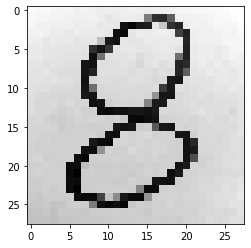

In [215]:
plt.imshow(small, cmap="gray")

In [216]:
invert = (small < 100).astype(int) * 255

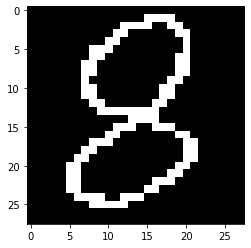

In [217]:
plt.imshow(invert, cmap="gray")

In [218]:
res = (model.predict(invert.flatten().reshape(1,-1)))
np.argsort(res[0])

array([[0, 6, 9, 5, 1, 4, 8, 7, 2, 3]])

In [219]:
np.argmax(res[0])

3

In [220]:
np.argmax(res[1])

1